In [1]:
# Import necessary libraries
import itertools
import numpy as np
import pandas as pd 
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
%matplotlib inline


In [2]:
# Read the dataset
df = pd.read_csv("airquality.csv",index_col=0)

# Take a quick look at the data
df.head(10)


,Ozone,Solar.R,Wind,Temp,Month,Day
1,41.0,190.0,7.4,67,5,1
2,36.0,118.0,8.0,72,5,2
3,12.0,149.0,12.6,74,5,3
4,18.0,313.0,11.5,62,5,4
5,NaN,NaN,14.3,56,5,5
6,28.0,NaN,14.9,66,5,6
7,23.0,299.0,8.6,65,5,7
8,19.0,99.0,13.8,59,5,8
9,8.0,19.0,20.1,61,5,9
10,NaN,194.0,8.6,69,5,10


In [4]:
# Use the column Ozone to drop any NaNs from the dataframe
df = df[df.Ozone.notna()]


In [6]:
# Assign the values of Ozon column as the predictor variable
x = df[['Ozone']].values

# Use temperature as the response data
y = df['Temp']


In [7]:
# Split the data into train and test sets with train size as 0.8 
# and set random_state as 102
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=102)


### Bagging Regressor

In [11]:
# Specify the number of bootstraps as 30
num_bootstraps = 30

# Specify the maximum depth of the decision tree as 3
max_depth = 3

# Define the Bagging Regressor Model
# Use Decision Tree as your base estimator with depth as mentioned in max_depth
# Initialise number of estimators using the num_bootstraps value
model = BaggingRegressor(estimator = DecisionTreeRegressor(max_depth = max_depth), n_estimators = num_bootstraps, random_state = 42)
                        

# Fit the model on the train data
model.fit(x_train, y_train)


BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=30,
                 random_state=42)

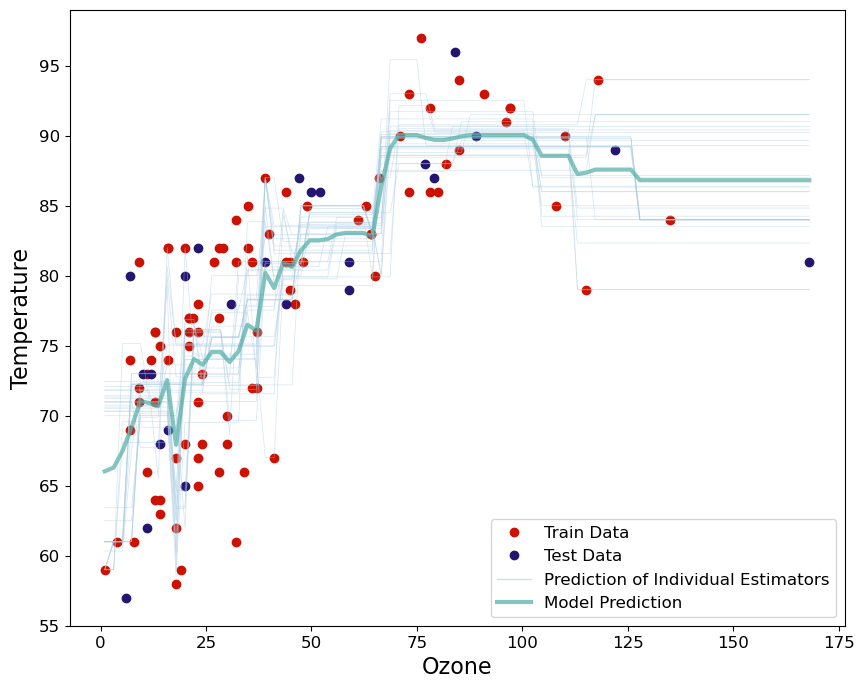

In [12]:
# Helper code to plot the predictions of individual estimators 
plt.figure(figsize=(10,8))

xrange = np.linspace(x.min(),x.max(),80).reshape(-1,1)
plt.plot(x_train,y_train,'o',color='#CC1100', markersize=6, label="Train Data")
plt.plot(x_test,y_test,'o',color='#241571', markersize=6, label="Test Data")
plt.xlim()
for i in model.estimators_:
    y_pred1 = i.predict(xrange)
    plt.plot(xrange,y_pred1,alpha=0.5,linewidth=0.5,color = '#ABCCE3')
plt.plot(xrange,y_pred1,alpha=0.6,linewidth=1,color = '#ABCCE3',label="Prediction of Individual Estimators")


y_pred = model.predict(xrange)
plt.plot(xrange,y_pred,alpha=0.7,linewidth=3,color='#50AEA4', label='Model Prediction')
plt.xlabel("Ozone", fontsize=16)
plt.ylabel("Temperature", fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='best',fontsize=12)
plt.show();


In [13]:
# Compute the test MSE of the prediction of first estimator
y_pred1 = model.estimators_[0].predict(x_test)

# Print the test MSE 
print("The test MSE of one estimator in the model is", round(mean_squared_error(y_test,y_pred1),2))


The test MSE of one estimator in the model is 33.73


In [14]:
### edTest(test_mse) ###
# Compute the test MSE of the model prediction
y_pred = model.predict(x_test)

# Print the test MSE 
print("The test MSE of the model is",round(mean_squared_error(y_test,y_pred),2))


The test MSE of the model is 31.34
